<a href="https://colab.research.google.com/github/XimenaRamirezA/AI-FIME-2024/blob/ACTIVIDADES/PIA_REDNEURO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universidad Autónoma de Nuevo León - Facultad de Ingeniería Mecánica y Electrica**
**Asignatura.**
>Redes Neuronales.

>Ju(V1), Ago - Dic 2024.

**Actividad.**

>Producto Integrador de Aprendizaje.

**Catedrático.**
>Tomas Eloy Salais Fierro.

**Alumnos.**
> 1948108 Jan Pablo Camarillo Ortiz.

>1952503 Ximena Montserrat Ramirez Aguilar.




---



# **Detection of Neurodegenerative Diseases through MRI: Alzheimer's Edition**

**LIBRARIES**

In [101]:
import numpy as np # librería para el cálculo numérico y la manipulación de arreglos multidimensionales (como matrices y vectores)
import pandas as pd # librería que proporciona estructuras con datos tabulares (similares a una hoja de cálculo).data processing, CSV file I/O (e.g. pd.read_csv)
import os # Importa una manera de interactuar con el sistema operativo (por ejemplo, gestionar directorios y archivos).
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [107]:
import numpy as np
import cv2 #Image Processing library
import os #Routes of the files

**Datasets of Kaggle.**

In [102]:
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset
License(s): GNU Lesser General Public License 3.0
augmented-alzheimer-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [103]:
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset-v2

Dataset URL: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset-v2
License(s): GNU Lesser General Public License 3.0
augmented-alzheimer-mri-dataset-v2.zip: Skipping, found more recently modified local copy (use --force to force download)


**Export the files from the zip to Google Collab.**


In [104]:
#DATASET FOR THE TRAINING
import zipfile
zip_ref1 = zipfile.ZipFile('/content/augmented-alzheimer-mri-dataset.zip', 'r')
zip_ref1.extractall('/content')
zip_ref1.close()

In [105]:
#DATASET FOR THE TESTING
import zipfile
zip_ref2 = zipfile.ZipFile('/content/augmented-alzheimer-mri-dataset-v2.zip', 'r')
zip_ref2.extractall('/content')
zip_ref2.close()

In [106]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [108]:
data_dir = "/content/data/train"
sub_folders = os.listdir(data_dir)
print(len(sub_folders))

5


In [109]:
data_dir = "/content/AugmentedAlzheimerDataset"
sub_folders = os.listdir(data_dir)
print(len(sub_folders))

4


In [110]:
images = []
labels = []

#**Pre-processing**

**Transformation of the scales (gray scale, size, etc.) for the MRI**

Shape of images array: (33984, 164, 164)


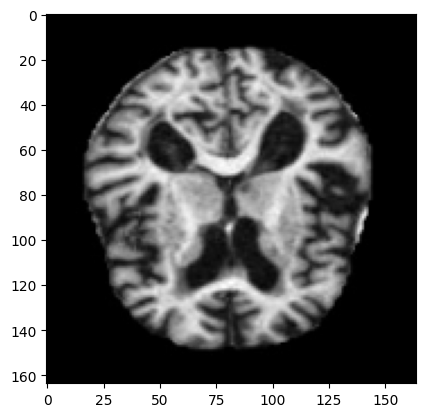

In [111]:
for sub_folder in sub_folders:
    label = sub_folder
    path = os.path.join(data_dir, sub_folder)
    sub_folder_images = os.listdir(path)

    for image_name in sub_folder_images:
        image_path = os.path.join(path, image_name)

        # Load image and check if it's valid
        img = cv2.imread(image_path)
        if img is not None:  # Add a check if image loaded successfully
            # Convert to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize the image
            resized_img = cv2.resize(gray_img, (164, 164))

            # Append the images and labels
            images.append(resized_img)
            labels.append(label)
        else:
            print(f"Warning: Could not load image: {image_path}") # Print warning for failed images

# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Check the shape of the images array to confirm
print("Shape of images array:", images.shape)

plt.imshow(resized_img, cmap='gray') # Display last processed image (if needed)
plt.show()

In [112]:
#Numpy usage
images = np.array(images)
labels = np.array(labels)

In [113]:
#Declare the function for the viewing of the MRI
img_resized = cv2.resize(resized_img, (164, 164), )
img_resized = cv2.bitwise_not(img_resized)

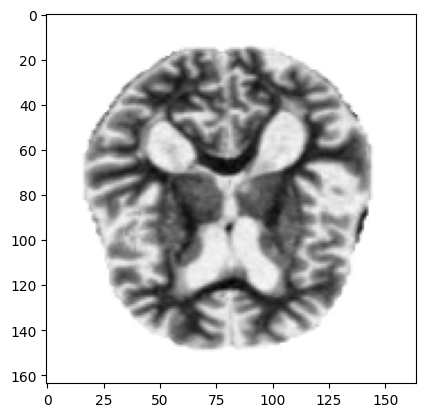

In [114]:
Numeros='/content/data/train'
plt.imshow(img_resized, cmap='gray')
plt.savefig("/content/data/train/abc.png")


In [115]:
train_dir = "/content/data/train"

In [116]:
test_dir = "//content/AugmentedAlzheimerDataset"

In [117]:
images = np.array(images)
labels = np.array(labels)

In [118]:
!pip install sklearn
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [119]:
# Preprocessing: visualization of variables and image normalization.
train_images.shape

(27187, 164, 164)

In [120]:
len(train_labels)

27187

In [121]:
train_labels

array(['MildDemented', 'VeryMildDemented', 'MildDemented', ...,
       'ModerateDemented', 'NonDemented', 'ModerateDemented'],
      dtype='<U16')

In [122]:
test_images.shape

(6797, 164, 164)

In [123]:
# Normalization of pixel values.
train_images = train_images / 255.0
test_images = test_images / 255.0

#**Structure and training of Convolutional Artificial Neural Network (CNN)**

In [124]:
# Convolutional part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(164, 164, 1)))  # Adjust input shape
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [125]:
# Learning part
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [126]:
# Model Compliation: Features
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Labels Encodement**

In [127]:
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the labels and transform them to numerical labels
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Convert numerical labels to one-hot encoded format
train_labels_one_hot = to_categorical(train_labels_encoded)
test_labels_one_hot = to_categorical(test_labels_encoded)

#**CNN Accuracy Results**



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


850/850 [==============================] - 152s 178ms/step - loss: 0.8092 - accuracy: 0.6457 - val_loss: 0.5122 - val_accuracy: 0.7918
Epoch 2/10
850/850 [==============================] - 147s 173ms/step - loss: 0.3581 - accuracy: 0.8596 - val_loss: 0.3756 - val_accuracy: 0.8443
Epoch 3/10
850/850 [==============================] - 148s 174ms/step - loss: 0.1892 - accuracy: 0.9268 - val_loss: 0.4025 - val_accuracy: 0.8551
Epoch 4/10
850/850 [==============================] - 148s 174ms/step - loss: 0.1020 - accuracy: 0.9614 - val_loss: 0.4575 - val_accuracy: 0.8648
Epoch 5/10
850/850 [==============================] - 148s 174ms/step - loss: 0.0602 - accuracy: 0.9785 - val_loss: 0.5108 - val_accuracy: 0.8670
Epoch 6/10
850/850 [==============================] - 144s 170ms/step - loss: 0.0430 - accuracy: 0.9847 - val_loss: 0.6464 - val_accuracy: 0.8595
Epoch 7/10
850/850 [==============================] - 145s 170ms/step - loss: 0.0398 - accuracy: 0.9869 - val_loss: 0.5828 - val_accura

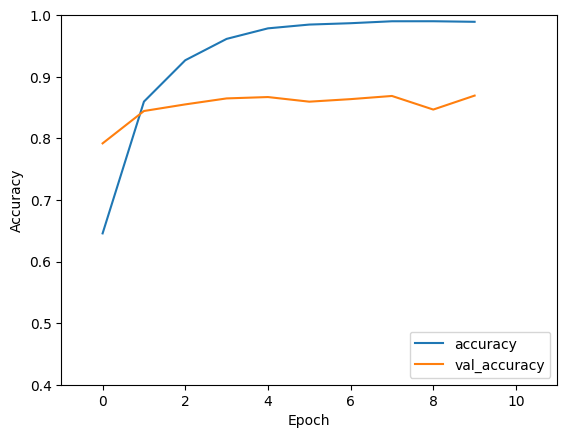

213/213 - 9s - loss: 0.6364 - accuracy: 0.8694 - 9s/epoch - 41ms/step


In [128]:
# Train the model and capture the training history
history = model.fit(train_images, train_labels_encoded, epochs=10,
                    validation_data=(test_images, test_labels_encoded))


# Plotting the training and validation accuracies
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels_encoded, verbose=2)

#**Predictions with the trained CNN.**

In [190]:
predictions = model.predict(test_images)

213/213 [==============================] - 8s 39ms/step


In [191]:
print(predictions.shape)  # Esto te mostrará cuántas filas y columnas tiene predictions
print(test_labels.shape)  # Verifica también las dimensiones de test_labels

(6797, 10)
(6797,)


**Prediction 1**

In [192]:
index = 1 #Imagen del índice 1

# Obtiene la predicción y la etiqueta verdadera
predicted_class_index = np.argmax(predictions[index])  # Obtiene el índice de la clase predicha
true_class_index = np.argmax(test_labels_one_hot[index])  # Obtiene el índice de la clase verdadera

# Decodifica los índices a las etiquetas originales
predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]
true_class_label = label_encoder.inverse_transform([true_class_index])[0]

# Imprime los resultados
print("La red dice que la imagen es clase '" + predicted_class_label + "' y la clase verdadera es: '" + true_class_label + "'")

La red dice que la imagen es clase 'NonDemented' y la clase verdadera es: 'NonDemented'


**Prediction 2**

In [193]:
index = 50 #Imagen del índice 50

predicted_class_index = np.argmax(predictions[index])
true_class_index = np.argmax(test_labels_one_hot[index])
predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]
true_class_label = label_encoder.inverse_transform([true_class_index])[0]
print("La red dice que la imagen es clase '" + predicted_class_label + "' y la clase verdadera es: '" + true_class_label + "'")

La red dice que la imagen es clase 'MildDemented' y la clase verdadera es: 'MildDemented'


**Prediction 3**

In [194]:
index = 40 #Imagen del índice 40

predicted_class_index = np.argmax(predictions[index])
true_class_index = np.argmax(test_labels_one_hot[index])
predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]
true_class_label = label_encoder.inverse_transform([true_class_index])[0]
print("La red dice que la imagen es clase '" + predicted_class_label + "' y la clase verdadera es: '" + true_class_label + "'")

La red dice que la imagen es clase 'MildDemented' y la clase verdadera es: 'MildDemented'


**Prediction 4**

In [195]:
index = 77 #Imagen del índice 77

predicted_class_index = np.argmax(predictions[index])
true_class_index = np.argmax(test_labels_one_hot[index])
predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]
true_class_label = label_encoder.inverse_transform([true_class_index])[0]
print("La red dice que la imagen es clase '" + predicted_class_label + "' y la clase verdadera es: '" + true_class_label + "'")

La red dice que la imagen es clase 'NonDemented' y la clase verdadera es: 'NonDemented'


**Prediction 5**

In [196]:
index = 58 #Imagen del índice 58

predicted_class_index = np.argmax(predictions[index])
true_class_index = np.argmax(test_labels_one_hot[index])
predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]
true_class_label = label_encoder.inverse_transform([true_class_index])[0]
print("La red dice que la imagen es clase '" + predicted_class_label + "' y la clase verdadera es: '" + true_class_label + "'")

La red dice que la imagen es clase 'ModerateDemented' y la clase verdadera es: 'ModerateDemented'


**Visual interpretations of the predictions.**

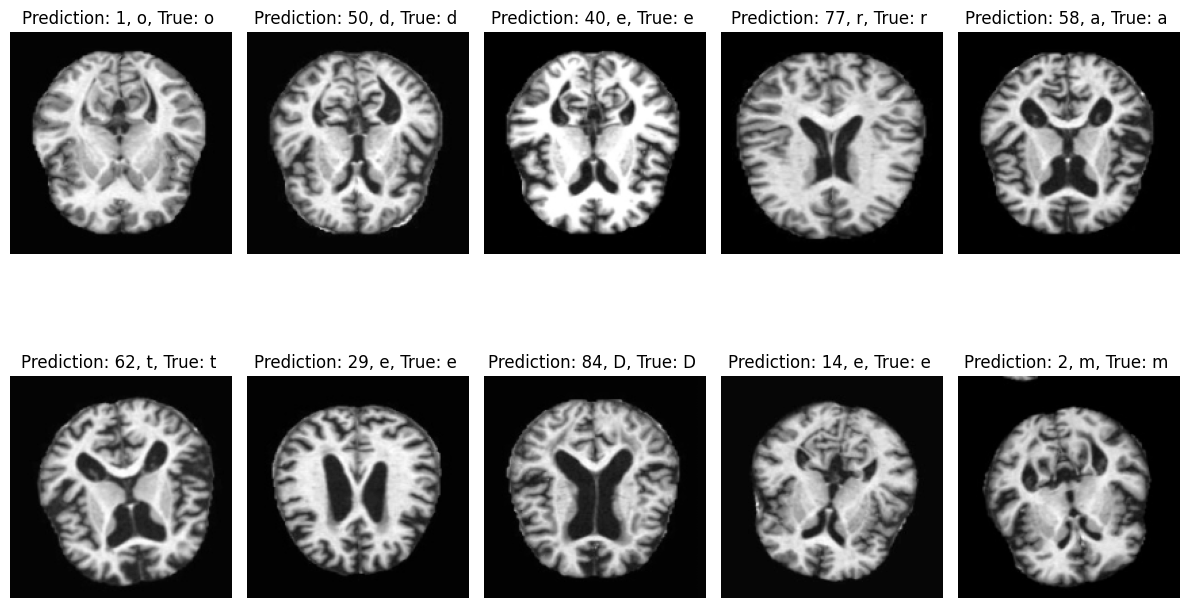

In [197]:
import matplotlib.pyplot as plt

# Indices of predictions to display
indices = [1, 50, 40, 77, 58, 62, 29, 84, 14, 2]

# Assuming test_images contains the images
images_to_show = [test_images[i] for i in indices]

# Display the images
plt.figure(figsize=(12, 8))
for i, image in enumerate(images_to_show, 1):
    plt.subplot(2, 5, i)
    plt.imshow(image, cmap='gray')
    plt.title(f"Prediction: {indices[i-1]}, {predicted_class_label[i][0]}, True: {true_class_label[i][0]} ")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Interpretation of the data**

En las imágenes de la primera fila tenemos los 5 ejemplos de predicción ejemplificados en el código, la 2da fila muestra resultados adicionales.


Nota: En las imágenes se pueden observar etiquetas que muestran el número de índice de la imágen y la comparación de resultado entre la predicción y la  etiqueta verdadera.

[Como comentario adicional, se muestra la 2da-3er letra de la etiqueta dada, es por eso que varían las letras, no obstante pueden pertenecer a la misma etiqueta, por eso se realizó la ejemplificación de las 5 predicciones].




-----------------------------------------------------------------


In the images of the first row, we have the 5 prediction examples illustrated in the code; the second row shows additional results.

Note: In the images, labels can be seen that display the index number of the image and the comparison of results between the prediction and the true label.

[As an additional comment, the 2nd-3rd letter of the given label is shown, which is why the letters vary; however, they may belong to the same label, which is why the 5 predictions were exemplified].